## Парсинг сайта банка ПСБ

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3)

pd.set_option("max_colwidth", 150)

### Откроем страницу потребительских кредитов

In [2]:
url = "https://www.psbank.ru/Personal/Loans?roistat_visit=594681&filter=vse_predlozheniya"
page = requests.get(url)
soup = (
        bs(page.content, "html.parser")
        .find_all('div', class_='product-card__top')
    )

In [3]:
# Создадим необходимые списки
title =[]
percent = []
sum = []
period = []

for row in soup:
    title_element = row.find("h2")
    if not title_element in title:
        title.append(title_element.text)
    
    element = row.find('div', class_="product-card__advantages")
    percent_element = element.find_all('div')[1] 
    if not percent_element in percent:
        percent.append(percent_element.text)

    sum_element = element.find_all('div')[3]
    if not sum_element in sum:
        sum.append(sum_element.text)

    period_element = element.find_all('div')[6]    
    if not period_element in period:
        period.append(period_element.text)
 
print(title)
print(percent)
print(sum)
print(period)

['Кредит особого назначения', 'Кредит для работников предприятий ОПК и\xa0военнослужащих', 'Кредит для госслужащих и бюджетников', 'Кредит для держателей зарплатных карт', 'Кредит для клиентов с кредитной историей ПСБ', 'Кредит для вкладчиков ПСБ', 'Рефинансирование кредитов', 'Кредит «Открытый рынок»']
['от\xa05,5%', 'От\xa05,5%', 'От\xa07,5%', 'От\xa06,5%', 'От\xa09,5%', 'От\xa09,5%', 'От\xa05,5%', 'От\xa014,5%']
['\nДо 5 млн ₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa05\xa0млн\xa0₽\nСумма\n', '\nДо\xa03\xa0млн\xa0₽\nСумма\n']
['\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa07\xa0лет\nСрок\n', '\nДо\xa05\xa0лет\nСрок\n']


In [4]:
# Соберем датафрейм
columns = {'credit': title, 'percent_%': percent, 'sum_million': sum, 'number_years': period}
df = pd.DataFrame(columns)
df

,credit,percent_%,sum_million,number_years
0,Кредит особого назначения,"от 5,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
1,Кредит для работников предприятий ОПК и военнослужащих,"От 5,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
2,Кредит для госслужащих и бюджетников,"От 7,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
3,Кредит для держателей зарплатных карт,"От 6,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
4,Кредит для клиентов с кредитной историей ПСБ,"От 9,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
5,Кредит для вкладчиков ПСБ,"От 9,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
6,Рефинансирование кредитов,"От 5,5%",\nДо 5 млн ₽\nСумма\n,\nДо 7 лет\nСрок\n
7,Кредит «Открытый рынок»,"От 14,5%",\nДо 3 млн ₽\nСумма\n,\nДо 5 лет\nСрок\n


In [5]:
# Очистим данные
df['sum_million'] = df['sum_million'].str.replace(r'\D', '', regex=True).astype('Int64')
df['number_years'] = df['number_years'].str.replace(r'\D', '', regex=True).astype('Int64')
df['percent_%'] = df['percent_%'].str.split('\xa0').str[1]
df

,credit,percent_%,sum_million,number_years
0,Кредит особого назначения,"5,5%",5,7
1,Кредит для работников предприятий ОПК и военнослужащих,"5,5%",5,7
2,Кредит для госслужащих и бюджетников,"7,5%",5,7
3,Кредит для держателей зарплатных карт,"6,5%",5,7
4,Кредит для клиентов с кредитной историей ПСБ,"9,5%",5,7
5,Кредит для вкладчиков ПСБ,"9,5%",5,7
6,Рефинансирование кредитов,"5,5%",5,7
7,Кредит «Открытый рынок»,"14,5%",3,5


In [6]:
df['percent_%'] = df['percent_%'].str.split('%').str[0]
df['percent_%'] = [float(str(i).replace(",", ".")) for i in df['percent_%']]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credit        8 non-null      object 
 1   percent_%     8 non-null      float64
 2   sum_million   8 non-null      Int64  
 3   number_years  8 non-null      Int64  
dtypes: Int64(2), float64(1), object(1)
memory usage: 400.0+ bytes


,credit,percent_%,sum_million,number_years
0,Кредит особого назначения,5.5,5,7
1,Кредит для работников предприятий ОПК и военнослужащих,5.5,5,7
2,Кредит для госслужащих и бюджетников,7.5,5,7
3,Кредит для держателей зарплатных карт,6.5,5,7
4,Кредит для клиентов с кредитной историей ПСБ,9.5,5,7
5,Кредит для вкладчиков ПСБ,9.5,5,7
6,Рефинансирование кредитов,5.5,5,7
7,Кредит «Открытый рынок»,14.5,3,5


Очистили данные, привели к нужному типу.

In [7]:
# Сохраним потребительский датафрейм
df.to_csv('consumer_credit.csv')
df.to_excel('consumer_credit.xlsx')

### Откроем страницу ипотечных кредитов

In [8]:
# Вытащим ипотечные кредиты
url = 'https://www.psbank.ru/Personal/Mortgage?roistat_visit=594681'
page = requests.get(url)
soup = (
        bs(page.content, "html.parser")
        .find_all('div', class_='product-card__top')
    )

# Создадим необходимые списки
title =[]
percent = []
sum = []
period = []

for row in soup:
    title_element = row.find("h2")
    if not title_element in title:
        title.append(title_element.text)
    
    element = row.find('div', class_="product-card__advantages")
    percent_element = element.find_all('div')[1] 
    if not percent_element in percent:
        percent.append(percent_element.text)

    sum_element = element.find_all('div')[3]
    if not sum_element in sum:
        sum.append(sum_element.text)

    period_element = element.find_all('div')[6]    
    if not period_element in period:
        period.append(period_element.text)
 
print(title)
print(percent)
print(sum)
print(period)

['Семейная военная ипотека', 'Военная ипотека 5,5%. Госпрограмма', 'Военная ипотека', 'Госпрограмма 2020', 'Ипотека для ИТ-специалистов', 'Новостройка', 'Вторичное жилье', 'Семейная ипотека', 'Рефинансирование ипотеки', 'Кредит под залог квартиры', 'Дальневосточная ипотека']
['4,3%', '5,5%', '5,5%', '6,35%', '5%', 'От 9,5%', 'От 9,7%', 'От 5%', 'От 5%', 'От 9,9%', '1,5%']
['\nОт 15%\nПервоначальный взнос\n', '\nОт 15%\nПервоначальный взнос\n', '\nДо 25 лет\nСрок\n', '\nОт\xa015%\nПервоначальный взнос\n', '\nОт\xa015%\nПервоначальный взнос\n', '\nОт\xa010%\nПервоначальный взнос\n', '\nОт 10%\nПервоначальный взнос\n', '\nОт 15%\nПервоначальный взнос\n', '\nДо 30 лет\nСрок\n', '\nДо 30 лет\nСрок\n', '\nДо 20 лет\nСрок\n']
['\nДо 4 770 000 ₽\nСумма\n', '\nДо\xa04\xa0230\xa0000\xa0₽\nСумма\n', '\nДо\xa04\xa0230\xa0000\xa0₽\nСумма\n', '\nДо\xa030\xa0млн\xa0₽\nСумма\n', '\nДо 18 млн ₽\nСумма\n', '\nДо 30 млн ₽\nСумма\n', '\nДо 30 млн ₽\nСумма\n', '\nДо 12 млн ₽\nСумма\n', '\nДо 20 млн ₽\nСумм

Создадим датафрейм

In [9]:
columns = {'credit': title, 'percent_%': percent, '%_initial_payment': sum, 'sum_million': period}
df_mortgage = pd.DataFrame(columns)
df_mortgage

,credit,percent_%,%_initial_payment,sum_million
0,Семейная военная ипотека,"4,3%",\nОт 15%\nПервоначальный взнос\n,\nДо 4 770 000 ₽\nСумма\n
1,"Военная ипотека 5,5%. Госпрограмма","5,5%",\nОт 15%\nПервоначальный взнос\n,\nДо 4 230 000 ₽\nСумма\n
2,Военная ипотека,"5,5%",\nДо 25 лет\nСрок\n,\nДо 4 230 000 ₽\nСумма\n
3,Госпрограмма 2020,"6,35%",\nОт 15%\nПервоначальный взнос\n,\nДо 30 млн ₽\nСумма\n
4,Ипотека для ИТ-специалистов,5%,\nОт 15%\nПервоначальный взнос\n,\nДо 18 млн ₽\nСумма\n
5,Новостройка,"От 9,5%",\nОт 10%\nПервоначальный взнос\n,\nДо 30 млн ₽\nСумма\n
6,Вторичное жилье,"От 9,7%",\nОт 10%\nПервоначальный взнос\n,\nДо 30 млн ₽\nСумма\n
7,Семейная ипотека,От 5%,\nОт 15%\nПервоначальный взнос\n,\nДо 12 млн ₽\nСумма\n
8,Рефинансирование ипотеки,От 5%,\nДо 30 лет\nСрок\n,\nДо 20 млн ₽\nСумма\n
9,Кредит под залог квартиры,"От 9,9%",\nДо 30 лет\nСрок\n,\nДо 30 млн ₽\nСумма\n


In [10]:
# Очистим данные
df_mortgage['percent_%'] = df_mortgage['percent_%'].str.replace('[^0-9,]', '', regex=True)
df_mortgage['sum_million'] = df_mortgage['sum_million'].str.replace(r'\D', '', regex=True).astype('float')
df_mortgage['%_initial_payment'] = df_mortgage['%_initial_payment'].str.replace(r'\D', '', regex=True).astype('Int64')
df_mortgage

,credit,percent_%,%_initial_payment,sum_million
0,Семейная военная ипотека,"4,3",15,4770000.0
1,"Военная ипотека 5,5%. Госпрограмма","5,5",15,4230000.0
2,Военная ипотека,"5,5",25,4230000.0
3,Госпрограмма 2020,"6,35",15,30.0
4,Ипотека для ИТ-специалистов,5,15,18.0
5,Новостройка,"9,5",10,30.0
6,Вторичное жилье,"9,7",10,30.0
7,Семейная ипотека,5,15,12.0
8,Рефинансирование ипотеки,5,30,20.0
9,Кредит под залог квартиры,"9,9",30,30.0


- В столбце %_initial_payment собраны данные первоначальный взнос и срок с количеством лет. Разобъем на два столбца.
- Столбец sum_million приведем нули к нужному типу

In [11]:
df_mortgage['number_years'] = df_mortgage['%_initial_payment'].iloc[-3:]
df_mortgage['%_initial_payment'] =  df_mortgage['%_initial_payment'].loc[:7]

# Приведем все миллионы к одному типу
df_mortgage.loc[df_mortgage['sum_million'] == 4770000, 'sum_million']= 4.77
df_mortgage.loc[df_mortgage['sum_million'] == 4230000, 'sum_million']= 4.23

# Преобразуем тип процентов из строчный в дробный
df_mortgage['percent_%'] = [float(str(i).replace(",", ".")) for i in df_mortgage['percent_%']]
df_mortgage

,credit,percent_%,%_initial_payment,sum_million,number_years
0,Семейная военная ипотека,4.30,15,4.77,<NA>
1,"Военная ипотека 5,5%. Госпрограмма",5.50,15,4.23,<NA>
2,Военная ипотека,5.50,25,4.23,<NA>
3,Госпрограмма 2020,6.35,15,30.00,<NA>
4,Ипотека для ИТ-специалистов,5.00,15,18.00,<NA>
5,Новостройка,9.50,10,30.00,<NA>
6,Вторичное жилье,9.70,10,30.00,<NA>
7,Семейная ипотека,5.00,15,12.00,<NA>
8,Рефинансирование ипотеки,5.00,<NA>,20.00,30
9,Кредит под залог квартиры,9.90,<NA>,30.00,30


In [12]:
# Сохраним ипотечный датафрейм
df_mortgage.to_csv('mortgage_credit.csv')
df_mortgage.to_excel('mortgage_credit.xlsx')

### Откроем страницу кредитных карт

In [13]:
# Кредитная карта
url = 'https://www.psbank.ru/Personal/CreditCards?roistat_visit=594681&tab=podobrat_kartu'
page = requests.get(url)
soup = (
        bs(page.content, "html.parser")
        .find_all('div', class_='product-card__top')
    )

# Создадим необходимые списки
title =[]
sum = []
period = []

for row in soup:
    title_element = row.find("h2")
    if not title_element in title:
        title.append(title_element.text)
    
    element = row.find('div', class_="product-card__advantages")
    
    sum_element = element.find_all('div')[3]
    if not sum_element in sum:
        sum.append(sum_element.text)

    period_element = element.find_all('div')[1]    
    if not period_element in period:
        period.append(period_element.text)
 
print(title)
print(percent)
print(sum)
print(period)


['Кредитная карта 100+', 'Кредитная карта «Двойной кешбэк»']
['4,3%', '5,5%', '5,5%', '6,35%', '5%', 'От 9,5%', 'От 9,7%', 'От 5%', 'От 5%', 'От 9,9%', '1,5%']
['\nДо\xa01\xa0млн\xa0₽\r\n\nЛимит\n', '\nДо\xa011%\nКешбэк\n']
['101 день', 'До\xa055\xa0дней']


Соберем датафрейм

In [14]:
columns = {'credit': title, 'percent_%': np.nan, 'sum_million': sum , 'number_years': period}
df_card = pd.DataFrame(columns)
df_card

,credit,percent_%,sum_million,number_years
0,Кредитная карта 100+,NaN,\nДо 1 млн ₽\r\n\nЛимит\n,101 день
1,Кредитная карта «Двойной кешбэк»,NaN,\nДо 11%\nКешбэк\n,До 55 дней


Обработаем данные

In [15]:
df_card['percent_%'] = df_card['percent_%'].fillna(0)

# Кешбэк поменяем на лимит кредита
df_card['sum_million'] = df_card['sum_million'].str.replace('[^0-9,]', '', regex=True).astype('int64')
df_card.loc[df_card['sum_million'] == 11, 'sum_million'] = 1

# Переведем дни в года
df_card['number_years'] = df_card['number_years'].str.replace('[^0-9,]', '', regex=True).astype('int64')
df_card['number_years'] = round(df_card['number_years']/365, 3)
df_card.info()
df_card

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credit        2 non-null      object 
 1   percent_%     2 non-null      float64
 2   sum_million   2 non-null      int64  
 3   number_years  2 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 192.0+ bytes


,credit,percent_%,sum_million,number_years
0,Кредитная карта 100+,0.0,1,0.277
1,Кредитная карта «Двойной кешбэк»,0.0,1,0.151


In [16]:
# Сохраним карты датафрейм
df_card.to_csv('card_credit.csv')
df_card.to_excel('card_credit.xlsx')

### Объединим кредитные таблицы и посмотрим данные

In [17]:
df_credit = pd.concat([df, df_mortgage, df_card]).reset_index(drop=True)
df_credit

,credit,percent_%,sum_million,number_years,%_initial_payment
0,Кредит особого назначения,5.50,5.0,7.0,<NA>
1,Кредит для работников предприятий ОПК и военнослужащих,5.50,5.0,7.0,<NA>
2,Кредит для госслужащих и бюджетников,7.50,5.0,7.0,<NA>
3,Кредит для держателей зарплатных карт,6.50,5.0,7.0,<NA>
4,Кредит для клиентов с кредитной историей ПСБ,9.50,5.0,7.0,<NA>
5,Кредит для вкладчиков ПСБ,9.50,5.0,7.0,<NA>
6,Рефинансирование кредитов,5.50,5.0,7.0,<NA>
7,Кредит «Открытый рынок»,14.50,3.0,5.0,<NA>
8,Семейная военная ипотека,4.30,4.77,<NA>,15
9,"Военная ипотека 5,5%. Госпрограмма",5.50,4.23,<NA>,15


In [18]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit             21 non-null     object 
 1   percent_%          21 non-null     float64
 2   sum_million        21 non-null     Float64
 3   number_years       13 non-null     Float64
 4   %_initial_payment  8 non-null      Int64  
dtypes: Float64(2), Int64(1), float64(1), object(1)
memory usage: 1.0+ KB


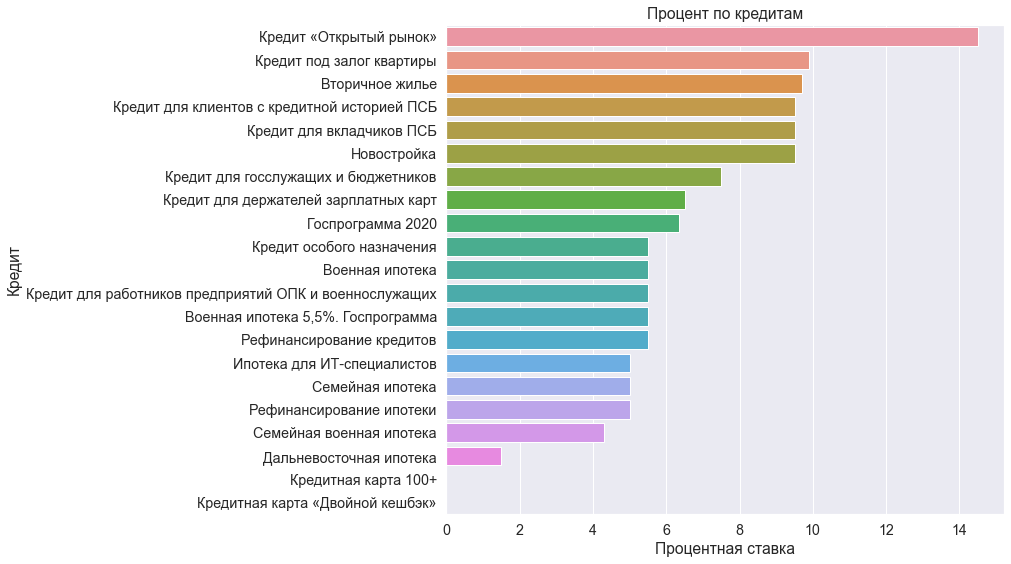

- Максимальный процент у продукта Кредит «Открытый рынок»- 14.5%.
- Минимальный процент у продукта Кредитная карта «Двойной кешбэк»- 0.0%.


In [19]:
df_credit = df_credit.sort_values('percent_%', ascending=False)
# Построим график
plt.figure(figsize=(10, 9))
sns.barplot(data=df_credit, x="percent_%", y="credit")
plt.title("Процент по кредитам")
plt.ylabel('Кредит')
plt.xlabel('Процентная ставка')
plt.show()

print('- Максимальный процент у продукта {}- {}%.\n- Минимальный процент у продукта {}- {}%.'
.format(
    df_credit.iloc[0]['credit'], df_credit['percent_%'].max(), 
    df_credit.iloc[df_credit.shape[0]-1]['credit'], df_credit['percent_%'].min(), 
    ))

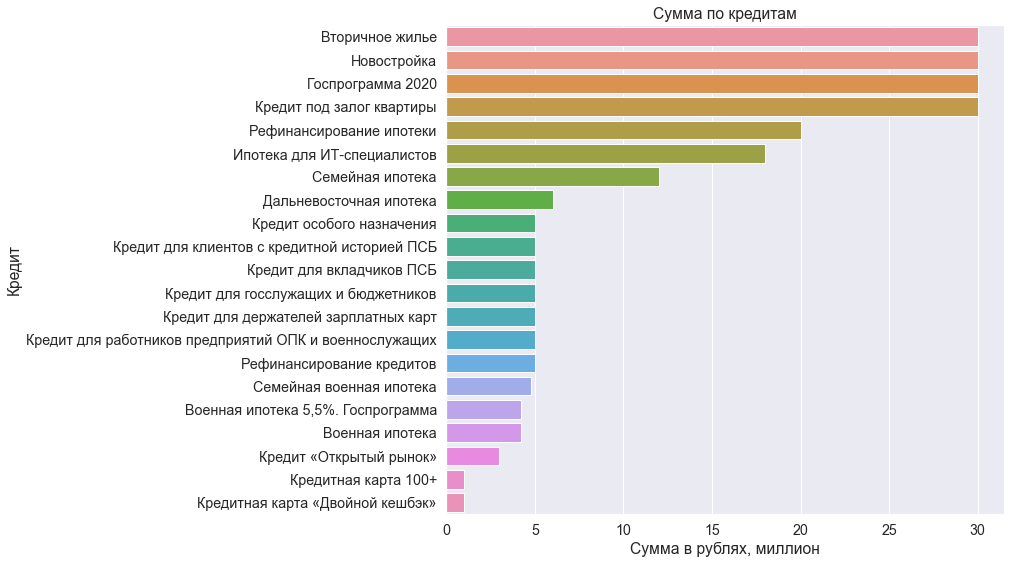

- Максимальная сумма по кредитам у продукта Вторичное жилье- 30.0 млн. рублей.
- Минимальная сумма по кредитам у продукта Кредитная карта «Двойной кешбэк»- 1.0 млн. рублей.


In [20]:
df_credit = df_credit.sort_values('sum_million', ascending=False)
# Построим график
plt.figure(figsize=(10, 9))
sns.barplot(data=df_credit, x="sum_million", y="credit")
plt.title("Сумма по кредитам")
plt.ylabel('Кредит')
plt.xlabel('Сумма в рублях, миллион')
plt.show()

print('- Максимальная сумма по кредитам у продукта {}- {} млн. рублей.\n- Минимальная сумма по кредитам у продукта {}- {} млн. рублей.'
.format(
    df_credit.iloc[0]['credit'], df_credit['sum_million'].max(), 
    df_credit.iloc[df_credit['number_years'].idxmin()]['credit'], df_credit['sum_million'].min(), 
    ))

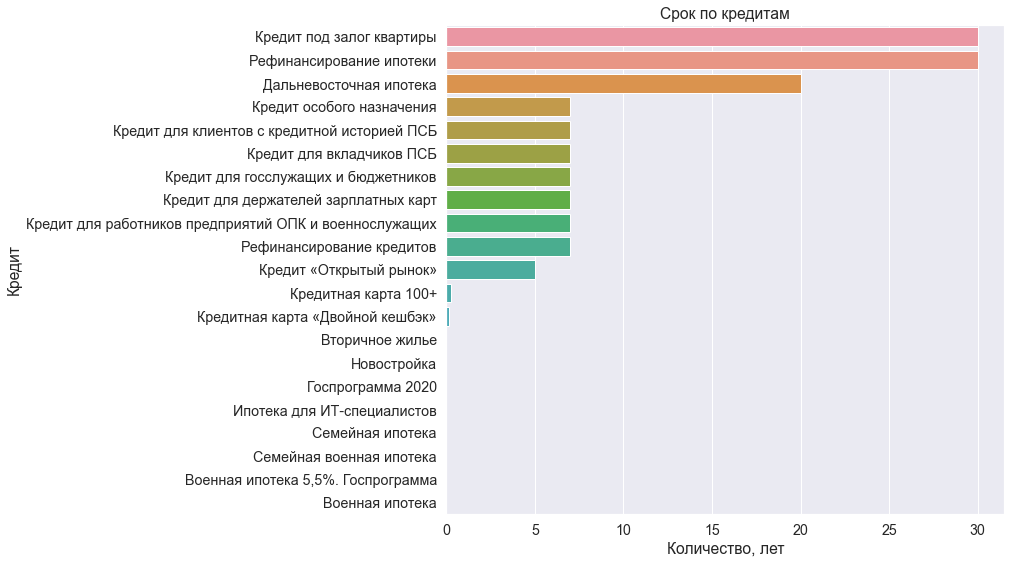

- Максимальный срок по кредитам у продукта Кредит под залог квартиры- 30.0 лет.
- Минимальный срок по кредитам у продукта Кредитная карта «Двойной кешбэк»- 0.151 лет.


In [21]:
df_credit = df_credit.sort_values('number_years', ascending=False).reset_index(drop=True)
# Построим график
plt.figure(figsize=(10, 9))
sns.barplot(data=df_credit, x="number_years", y="credit")
plt.title("Срок по кредитам")
plt.ylabel('Кредит')
plt.xlabel('Количество, лет')
plt.show()

print('- Максимальный срок по кредитам у продукта {}- {} лет.\n- Минимальный срок по кредитам у продукта {}- {} лет.'
.format(
    df_credit.iloc[0]['credit'], df_credit['number_years'].max(), 
    df_credit.iloc[df_credit['number_years'].idxmin()]['credit'], df_credit['number_years'].min(), 
    ))

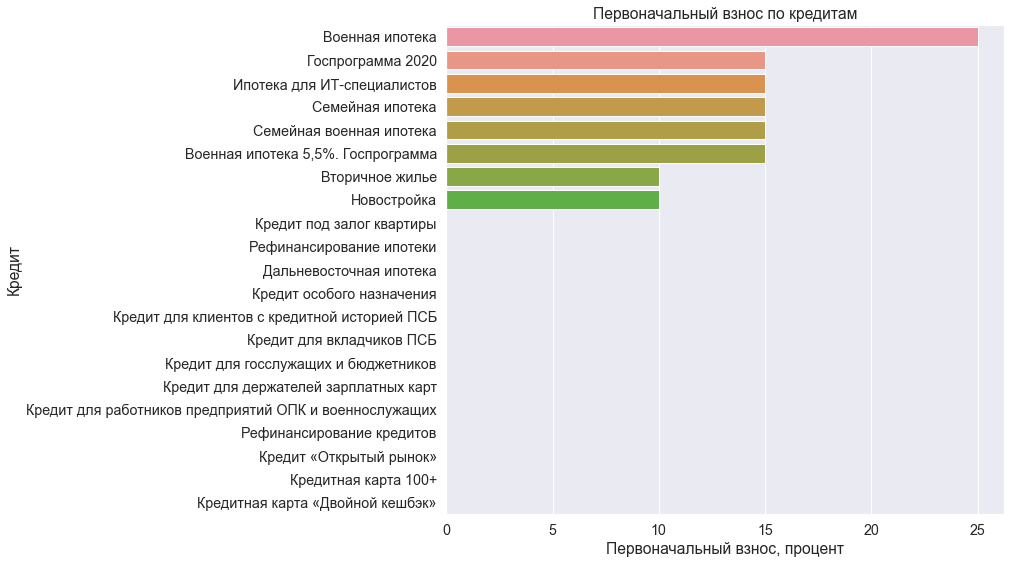

- Максимальный первоначальный взнос у продукта Военная ипотека- 25%.
- Минимальный первоначальный взнос у продукта Вторичное жилье- 10%.


In [22]:
df_credit = df_credit.sort_values('%_initial_payment', ascending=False).reset_index(drop=True)
# Построим график
plt.figure(figsize=(10, 9))
sns.barplot(data=df_credit, x="%_initial_payment", y="credit")
plt.title("Первоначальный взнос по кредитам")
plt.ylabel('Кредит')
plt.xlabel('Первоначальный взнос, процент')
plt.show()

print('- Максимальный первоначальный взнос у продукта {}- {}%.\n- Минимальный первоначальный взнос у продукта {}- {}%.'
.format(
    df_credit.iloc[0]['credit'], df_credit['%_initial_payment'].max(), 
    df_credit.iloc[df_credit['%_initial_payment'].idxmin()]['credit'], df_credit['%_initial_payment'].min(), 
    ))